In [4]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [5]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/facebook.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/facebook.gpickle


In [6]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 3075
Number of deinfluenced nodes: 0
Number of susceptible nodes: 964
influencer {1408, 3077, 1799, 2056, 9, 1034, 3599, 1299, 2197, 2582, 534, 3351, 2457, 1053, 29, 2847, 4000, 1566, 418, 1058, 935, 1319, 1069, 2488, 3897, 4026, 187, 1595, 3645, 3775, 1729, 971, 3277, 3280, 1750, 1495, 729, 482, 2789, 1511, 2794, 107, 3948, 364, 3695, 1137, 1140, 381, 1790, 511}


In [7]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (5, {'Random': set(), 'Degree': set()}), (10, {'Random': {1260}, 'Degree': set()}), (15, {'Random': {884, 1919, 3916}, 'Degree': set()}), (20, {'Random': {932, 3683, 3708, 3876}, 'Degree': set()}), (25, {'Random': {2626, 2261}, 'Degree': set()}), (30, {'Random': {3876, 2341, 3655, 392, 3626, 1914}, 'Degree': set()}), (35, {'Random': {716, 524, 2607, 250, 413}, 'Degree': {107}}), (40, {'Random': {3457, 3115, 3278, 2607, 2072}, 'Degree': {107}}), (45, {'Random': {1956, 293, 2540, 1581, 1102, 1711, 3055, 2647, 3415, 2943}, 'Degree': {107}}), (50, {'Random': {97, 1763, 335, 1999, 2002, 1812, 1846, 188}, 'Degree': {107}}), (55, {'Random': {2817, 1251, 2054, 3111, 3056, 3347, 3475, 58}, 'Degree': {107}}), (60, {'Random': {737, 2342, 2413, 1806, 1039, 1493, 2005, 2681, 1308, 2207}, 'Degree': {107}}), (65, {'Random': {835, 2151, 1127, 1415, 2443, 3468, 1969, 2034, 2388, 3384, 441, 2491}, 'Degree': {107, 1684}}), (70, {'Random': {736, 2434, 804, 1739, 7

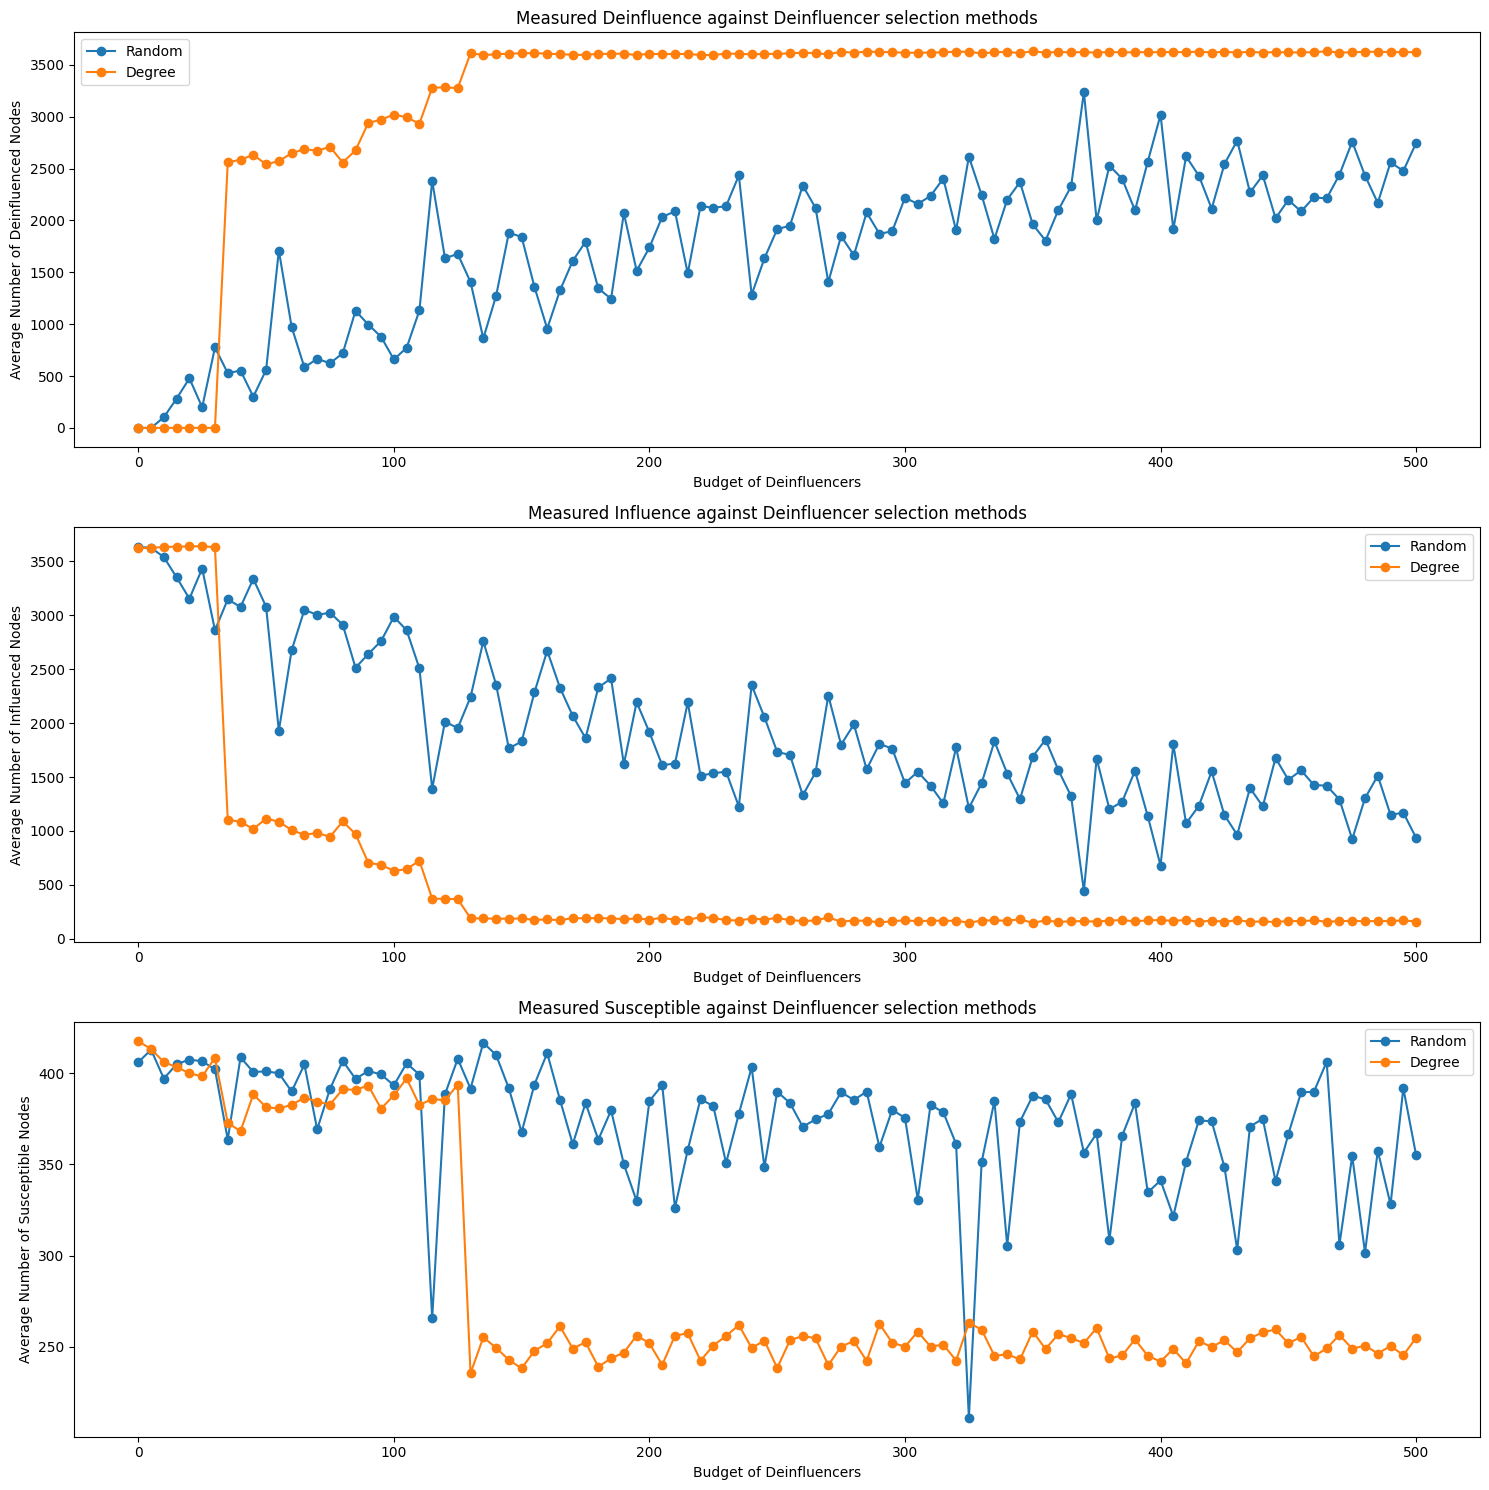

In [8]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [9]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (5, {'Random': {2980}, 'Degree': set()}), (10, {'Random': {280, 2545}, 'Degree': set()}), (15, {'Random': {3758, 3415, 1087}, 'Degree': set()}), (20, {'Random': {2039}, 'Degree': set()}), (25, {'Random': {2057, 3916, 3917, 1454, 1840}, 'Degree': set()}), (30, {'Random': {3016, 2570, 3950, 210, 2549, 286}, 'Degree': set()}), (35, {'Random': {2471, 1512, 1489, 209, 1780, 3385}, 'Degree': {107}}), (40, {'Random': {354, 34, 3939, 2210, 4009, 3190, 2552, 3899}, 'Degree': {107}}), (45, {'Random': {3842, 227, 3632, 2807, 924, 3293, 414}, 'Degree': {107}}), (50, {'Random': {3844, 3686, 1131, 2991, 1203, 2996, 982, 3836}, 'Degree': {107}}), (55, {'Random': {3810, 3531, 2413, 566, 1783, 1339, 3293}, 'Degree': {107}}), (60, {'Random': {704, 3009, 961, 3043, 2948, 357, 1476, 3175, 2213, 622, 2580, 2140}, 'Degree': {107}}), (65, {'Random': {706, 2375, 2216, 2666, 3310, 1843, 2900, 1173, 1692, 2845}, 'Degree': {107, 1684}}), (70, {'Random': {2664, 3054, 2767

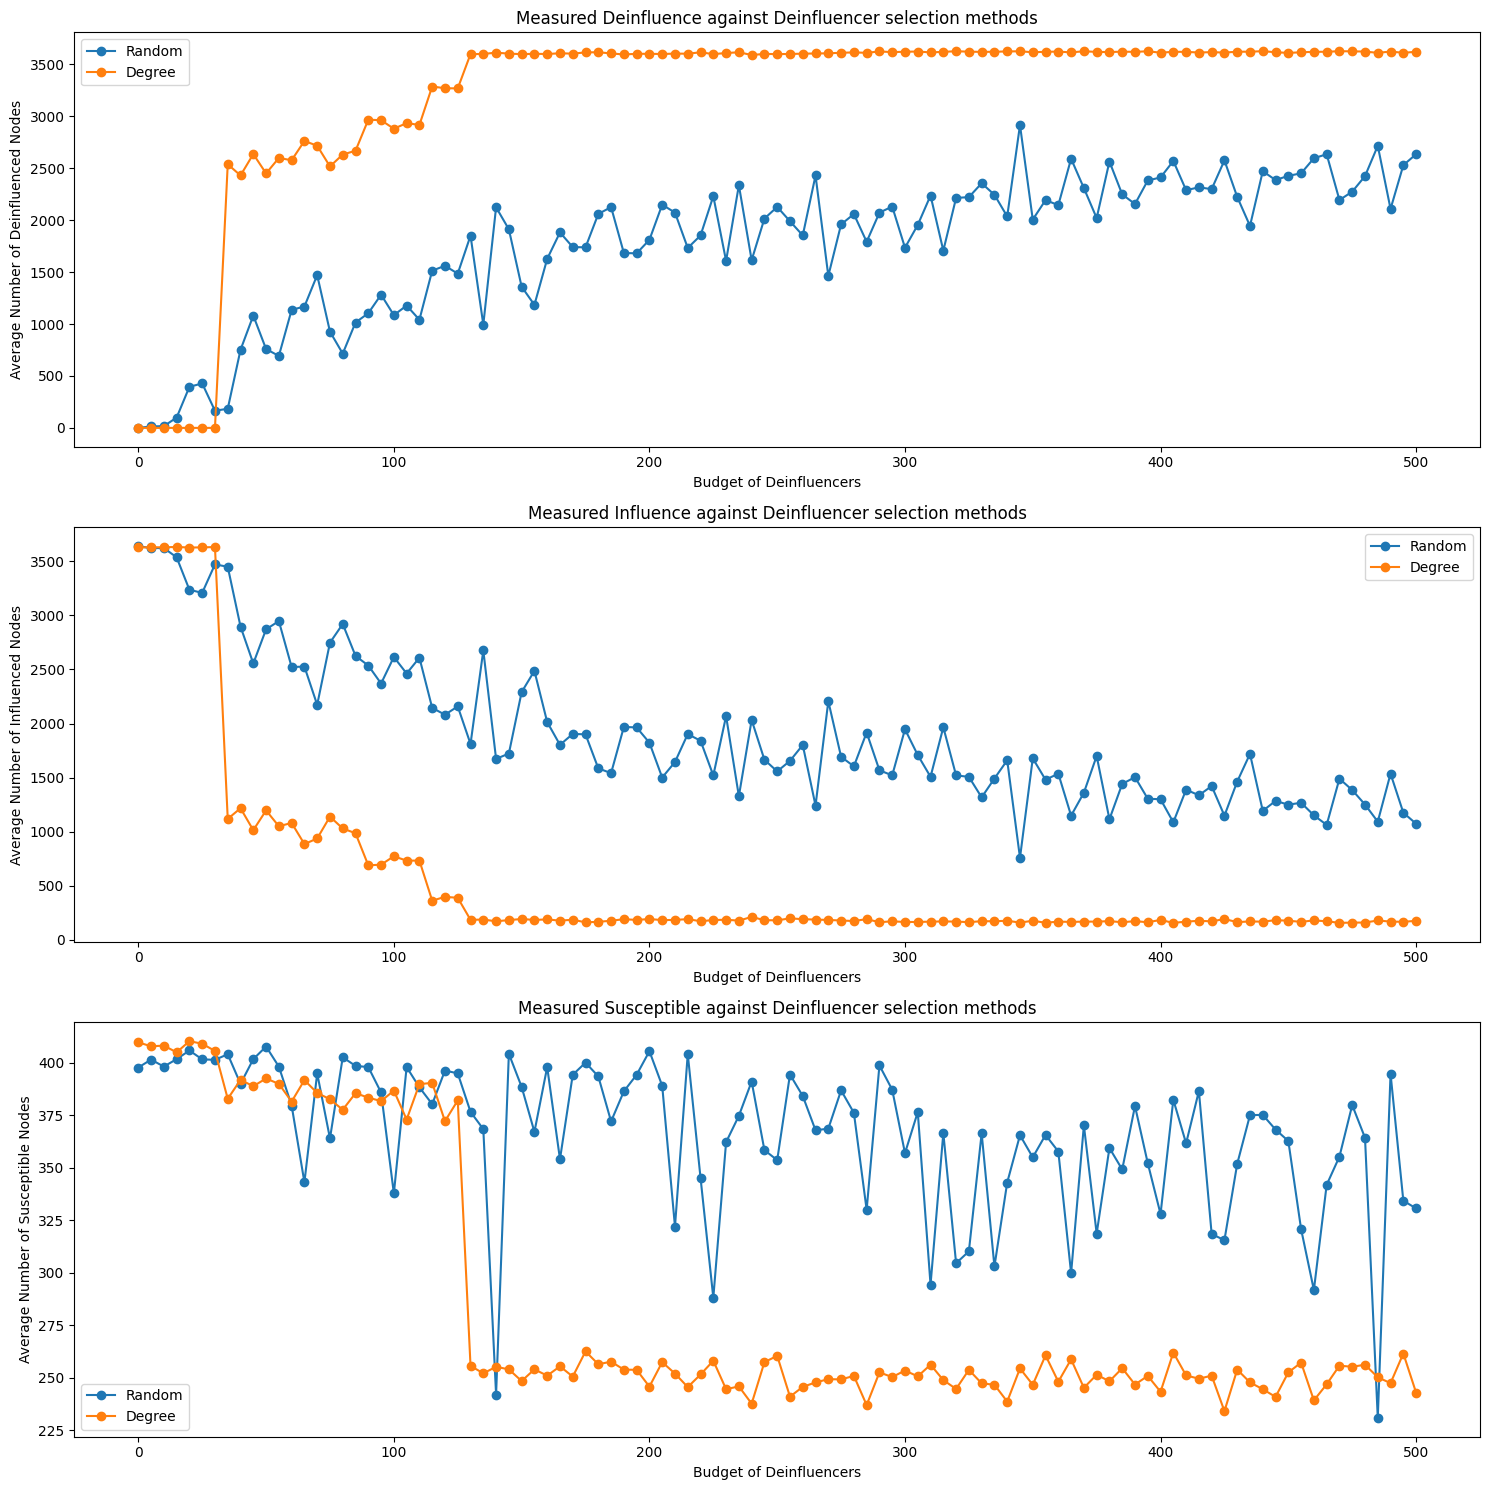

In [10]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()